In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:

# 直接调用 torchvision.transforms 对图片做一些处理
# ToTensor() 将 numpy 的数据类型转成 tensor，以及改变图片格式(numpy.transpose((2,0,1)))：H*W*C  -> C*H*W
# Normalize(mean, std, inplace=False): image=(image-mean)/std ,  mean、std 是指各个维度 mean 和 std, torch 处理图片的格式为 C、H、W
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./datasets/cifar10/', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./datasets/cifar10/', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
whos

Variable      Type          Data/Info
-------------------------------------
classes       tuple         n=10
os            module        <module 'os' from '/Users<...>rch/lib/python3.7/os.py'>
sys           module        <module 'sys' (built-in)>
testloader    DataLoader    <torch.utils.data.dataloa<...>object at 0x7fda176dca90>
testset       CIFAR10       Dataset CIFAR10\n    Numb<...> 0.5, 0.5))\n           )
torch         module        <module 'torch' from '/Us<...>kages/torch/__init__.py'>
torchvision   module        <module 'torchvision' fro<...>torchvision/__init__.py'>
trainloader   DataLoader    <torch.utils.data.dataloa<...>object at 0x7fda15042150>
trainset      CIFAR10       Dataset CIFAR10\n    Numb<...> 0.5, 0.5))\n           )
transform     Compose       Compose(\n    ToTensor()\<...>, std=(0.5, 0.5, 0.5))\n)
transforms    module        <module 'torchvision.tran<...>/transforms/__init__.py'>


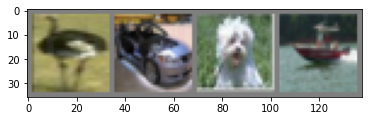

 bird   car   dog  ship


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 输出图像的函数
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 随机获取训练图片
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 显示图片
imshow(torchvision.utils.make_grid(images))
# 打印图片标签
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
import torch.nn as nn
import torch.nn.functional as F

# LeNet
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    # 输入层数据 size: [4, 3, 32, 32]（batch, channel, Height, Weight）
    def forward(self, x):
        # conv -> relu -> max pooling, output： 6 个 featuremap，每个 featuremap size: 14*14
        x = self.pool(F.relu(self.conv1(x)))
        # conv -> relu -> max pooling, output: 16 个 featuremap, 每个 featuremap size: 5*5
        x = self.pool(F.relu(self.conv2(x)))
        # 将 featuremap 展平，此时神经元数为 16*5*5 
        x = x.view(-1, 16 * 5 * 5)
        # linear -> relu, 神经元数为 120
        x = F.relu(self.fc1(x))
        # linear -> relu, 神经元数为 84
        x = F.relu(self.fc2(x))
        # linear, 神经元数为 10， 对应 10 个分类的概率
        x = self.fc3(x)
        return x


net = Net()

In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [8]:
epochs = 1
for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs) # size: [4, 10]
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.260
[1,  4000] loss: 1.906
[1,  6000] loss: 1.678
[1,  8000] loss: 1.566
[1, 10000] loss: 1.516
[1, 12000] loss: 1.473
Finished Training


In [9]:
whos

Variable       Type                              Data/Info
----------------------------------------------------------
F              module                            <module 'torch.nn.functio<...>/torch/nn/functional.py'>
Net            type                              <class '__main__.Net'>
classes        tuple                             n=10
criterion      CrossEntropyLoss                  CrossEntropyLoss()
data           list                              n=2
dataiter       _MultiProcessingDataLoaderIter    <torch.utils.data.dataloa<...>object at 0x7fda029bfad0>
epoch          int                               0
epochs         int                               1
i              int                               12499
images         Tensor                            tensor([[[[-0.0196,  0.25<...>59,  0.1137,  0.1529]]]])
imshow         function                          <function imshow at 0x7fda029244d0>
inputs         Tensor                            tensor([[[[ 0.3961,  0.36<...

In [10]:
# 保存参数
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

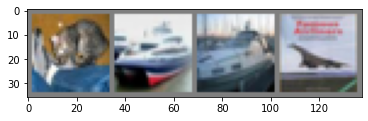

GroundTruth:    cat  ship  ship plane


In [11]:
# 从测试集取出一个 batch 的数据
dataiter = iter(testloader)
images, labels = dataiter.next()

# 输出图片
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [12]:
# 初始化网络，加载之前保存的参数模型
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [32]:
# 对上面取出的一个 batch 在加载模型中做前项计算，outputs 输出的是一个 batch 对应 10 分类的概率
outputs = net(images)
print(outputs.shape)

_, pred = torch.max(outputs, 1)
print("pred: {}, pred size: {}".format(pred, pred.size()))

torch.Size([4, 10])
pred: tensor([6, 5, 1, 7]), pred size: torch.Size([4])


In [21]:
# 预测分类结果
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat  ship  ship  ship


In [22]:
# 在测试集上，统计分类的准确率
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 48 %


In [36]:
# 在测试集上，分别统计所有分类的正确率
class_correct = [0. for i in range(10)]
class_total = [0. for i in range(10)]
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 57 %
Accuracy of   car : 52 %
Accuracy of  bird : 21 %
Accuracy of   cat : 19 %
Accuracy of  deer : 49 %
Accuracy of   dog : 54 %
Accuracy of  frog : 63 %
Accuracy of horse : 56 %
Accuracy of  ship : 67 %
Accuracy of truck : 41 %
